In [59]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [60]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
15,1175,2,42.00
19,800,1,32.00
0,1056,2,39.07
6,2732,4,135.00
11,2785,4,140.00


Preprocessing/Scaling: Since our columns are on different sacle it is important to perform scaling on them

In [61]:
sx = StandardScaler()
sy = StandardScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [62]:
scaled_X
# area and bed

array([[-0.90830532, -0.95399809],
       [ 0.92385017,  1.16599767],
       [-0.45263971,  0.10599979],
       [-0.35652274,  0.10599979],
       [-0.73743072, -0.95399809],
       [-0.7730296 , -0.95399809],
       [ 1.08048522,  1.16599767],
       [ 1.75449061,  1.16599767],
       [-0.60690151,  0.10599979],
       [ 2.22914229,  2.22599555],
       [-0.0254532 ,  0.10599979],
       [ 1.14337657,  1.16599767],
       [-0.97475656, -0.95399809],
       [-0.85609364, -0.95399809],
       [ 0.50852995,  0.10599979],
       [-0.76709645, -0.95399809],
       [-0.7611633 ,  0.10599979],
       [-0.33397679,  0.10599979],
       [ 1.12557713,  0.10599979],
       [-1.2120824 , -2.01399597]])

In [63]:
scaled_y
# price

array([[-0.93270651],
       [ 0.96466144],
       [-0.39512283],
       [-0.0903436 ],
       [-0.65301295],
       [-0.95779218],
       [ 1.31632978],
       [ 1.78522091],
       [-0.6764575 ],
       [ 2.06655558],
       [ 0.0737683 ],
       [ 1.43355256],
       [-0.95779218],
       [-0.91090307],
       [ 0.51921487],
       [-0.86401396],
       [-0.72334662],
       [-0.44201194],
       [ 0.54265942],
       [-1.09845952]])

In [64]:
def batch_gradient_descent(X, y_true, epochs, learning_rate=1):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2 / total_samples) * (X.T.dot(y_true - y_predicted))
        b_grad = -(2 / total_samples) * np.sum(y_true - y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y_true - y_predicted))
        
        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 2000, learning_rate=0.001)

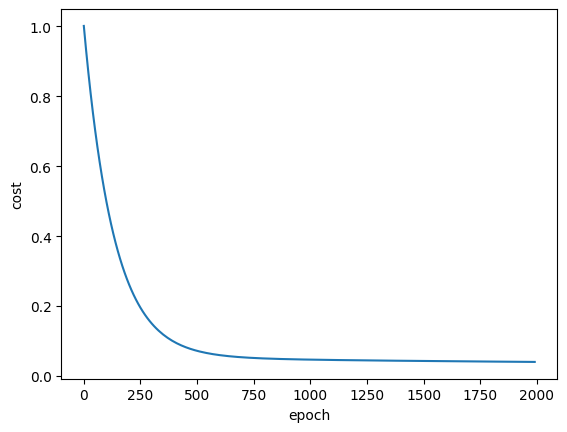

In [65]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [66]:
def predict(area, bedrooms, w, b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]

In [67]:
predicted_price = predict(2600, 4, w, b)
print(f"Predicted Price: {predicted_price}")

Predicted Price: 122.14882812443146


C:\Users\Yuvraj Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [68]:
predict(2785,4,w,b)

C:\Users\Yuvraj Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


127.99009356655506

(2) Stochastic Gradient Descent Implementation
Stochastic GD will use randomly picked single training sample to calculate error and using this error we backpropage to adjust weights

In [87]:
# we will use random libary to pick random training sample.
import random
random.randint(0,6) # randit gives random number between two numbers specified in the ar

6

In [98]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),90000, learning_rate=0.001)
w_sgd, b_sgd, cost_sgd

(array([0.72041689, 0.28026979]), 0.0021231771935435796, 0.11377416558939711)

In [99]:
w , b 

(array([0.62382417, 0.37626121]), 5.562217353372049e-17)

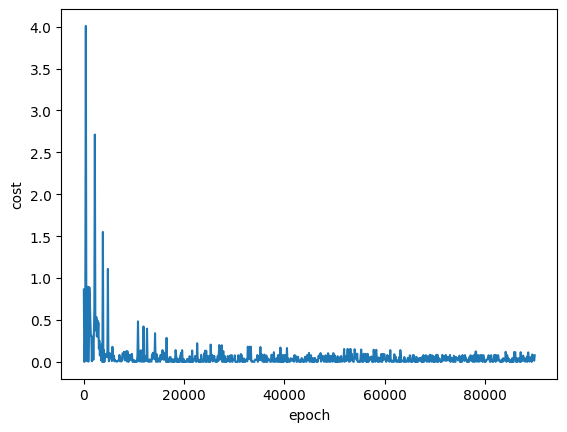

In [100]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [101]:
predict(2600,4,w_sgd, b_sgd) 

C:\Users\Yuvraj Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


121.27163526686323

In [102]:
predict(1000,2,w_sgd, b_sgd)

C:\Users\Yuvraj Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


37.58657461590123